In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [11]:
df = pd.read_csv('processed_dataset.csv')

In [12]:
df.head(10)

,UNIQUE_ID,GENDER,DAYS_STAY,AGE,Diagnosis_Certain Conditions originating in the Perinatal Period,"Diagnosis_Complications of Pregnancy, Childbirth, and the Puerperium",Diagnosis_Congenital Anomalies,Diagnosis_Diseases of the Blood and Blood-forming Organs,Diagnosis_Diseases of the Circulatory System,Diagnosis_Diseases of the Digestive System,...,Diagnosis_Neoplasms,Diagnosis_Supplementary Classification of External Causes of Injury and Poisoning,Diagnosis_Supplementary Classification of Factors influencing Health Status and Contact with Health Services,"Diagnosis_Symptoms, Signs and Ill-defined Conditions",Insurance_Government,Insurance_Medicaid,Insurance_Medicare,Insurance_Private,Insurance_Self Pay,avg_days
0,10000_187813,0,20.0,50.0,0,0,0,1,1,1,...,0,0,0,1,0,0,0,0,1,14
1,10001_118420,0,1.0,0.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,10
2,10002_132138,0,2.0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,15
3,10003_144039,0,10.0,41.0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,12
4,10004_161106,0,3.0,53.0,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,0,12
5,10004_164713,0,17.0,52.0,0,0,0,0,1,1,...,0,1,1,1,0,0,1,0,0,12
6,10005_181146,1,2.0,0.0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,17
7,10006_142345,1,8.0,70.0,0,0,0,1,1,1,...,0,1,1,1,0,0,1,0,0,14
8,10007_166331,1,8.0,55.0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,17
9,10008_180596,1,23.0,0.0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,15


Text(0, 0.5, 'Média de Dias de Internação')

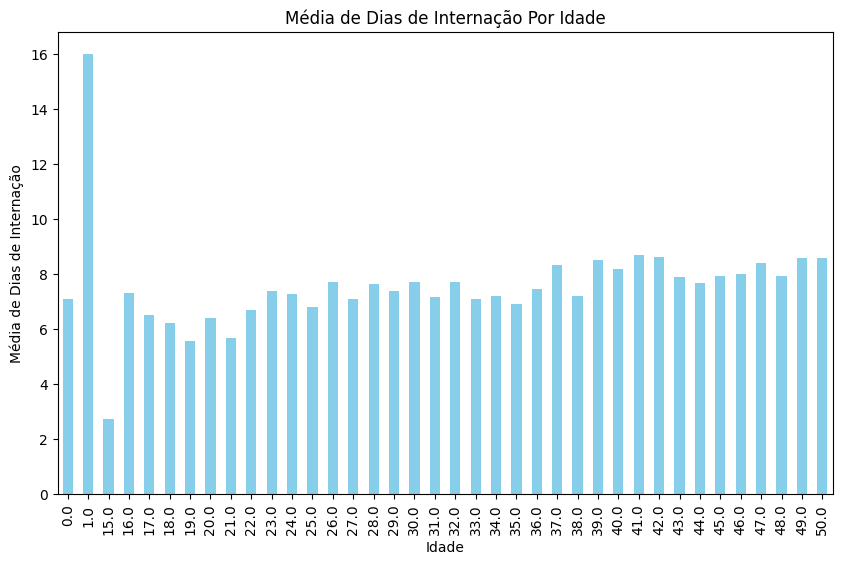

In [13]:
threshold = 50  

df1 = df.loc[df['AGE'] > threshold]
df2 = df.loc[df['AGE'] <= threshold]

age_stay_avg = df2.groupby('AGE')['DAYS_STAY'].mean()

# Criar o plot
plt.figure(figsize=(10, 6))
age_stay_avg.plot(kind='bar', color='skyblue')

# Adicionar títulos e rótulos
plt.title('Média de Dias de Internação Por Idade')
plt.xlabel('Idade')
plt.ylabel('Média de Dias de Internação')


In [14]:
#remove, caso existam outliers pra idade e tempo de internação
for col in ['AGE', 'DAYS_STAY']:
    Q1_train = df[col].quantile(0.25)
    Q3_train = df[col].quantile(0.75)
    IQR_train = Q3_train - Q1_train
    df[col] = np.where((df[col] > (Q3_train + 1.5*IQR_train)), (Q3_train + 1.5*IQR_train), df[col])

In [15]:
#se for prever sem diagnosticos 
# X = df.drop(['DAYS_STAY','UNIQUE_ID', 
#              'Diagnosis_Certain Conditions originating in the Perinatal Period',
#              'Diagnosis_Complications of Pregnancy, Childbirth, and the Puerperium',
#              'Diagnosis_Congenital Anomalies',
#              'Diagnosis_Diseases of the Blood and Blood-forming Organs',
#              'Diagnosis_Diseases of the Circulatory System',
#              'Diagnosis_Diseases of the Digestive System',
#              'Diagnosis_Diseases of the Genitourinary System',
#              'Diagnosis_Diseases of the Musculoskeletal System and Connective Tissue',
#              'Diagnosis_Diseases of the Nervous System and Sense Organs',
#              'Diagnosis_Diseases of the Respiratory System',
#              'Diagnosis_Diseases of the Skin and Subcutaneous Tissue',
#              'Diagnosis_Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders',
#              'Diagnosis_Infectious and Parasitic Diseases',
#              'Diagnosis_Injury and Poisoning',
#              'Diagnosis_Mental Disorders',
#              'Diagnosis_Neoplasms',
#              'Diagnosis_Supplementary Classification of External Causes of Injury and Poisoning',
#              'Diagnosis_Supplementary Classification of Factors influencing Health Status and Contact with Health Services',
#              'Diagnosis_Symptoms, Signs and Ill-defined Conditions'], axis=1)

#se for prever sem insurance7
X = df.drop(['DAYS_STAY','UNIQUE_ID',
             'GENDER'], axis=1)

#X = df.drop(['DAYS_STAY','UNIQUE_ID'], axis=1)
y = df['DAYS_STAY']

# divide entre treino e teste 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.head(1)

,AGE,Diagnosis_Certain Conditions originating in the Perinatal Period,"Diagnosis_Complications of Pregnancy, Childbirth, and the Puerperium",Diagnosis_Congenital Anomalies,Diagnosis_Diseases of the Blood and Blood-forming Organs,Diagnosis_Diseases of the Circulatory System,Diagnosis_Diseases of the Digestive System,Diagnosis_Diseases of the Genitourinary System,Diagnosis_Diseases of the Musculoskeletal System and Connective Tissue,Diagnosis_Diseases of the Nervous System and Sense Organs,...,Diagnosis_Neoplasms,Diagnosis_Supplementary Classification of External Causes of Injury and Poisoning,Diagnosis_Supplementary Classification of Factors influencing Health Status and Contact with Health Services,"Diagnosis_Symptoms, Signs and Ill-defined Conditions",Insurance_Government,Insurance_Medicaid,Insurance_Medicare,Insurance_Private,Insurance_Self Pay,avg_days
0,50.0,0,0,0,1,1,1,1,1,0,...,0,0,0,1,0,0,0,0,1,14


In [16]:
#normaliza os dados 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Interceptação: ", model.intercept_)

# Imprimir os coeficientes para cada recurso
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

y_pred = model.predict(X_test_scaled)

y_list = list(y_test)
y_pred_list = list(y_pred)

# Criar um DataFrame
result = pd.DataFrame({'Actual': y_list, 'Predicted': y_pred_list})
result.to_csv('results_with_diagnosis.csv', index=False)


Interceptação:  8.112011110361909
AGE: -0.41529072885958773
Diagnosis_Certain Conditions originating in the Perinatal Period: 2.146078688004197
Diagnosis_Complications of Pregnancy, Childbirth, and the Puerperium: 0.05855605624864938
Diagnosis_Congenital Anomalies: 0.8309467561525997
Diagnosis_Diseases of the Blood and Blood-forming Organs: 0.45422722552176503
Diagnosis_Diseases of the Circulatory System: 0.7270884765573872
Diagnosis_Diseases of the Digestive System: 0.5971374367875575
Diagnosis_Diseases of the Genitourinary System: 0.571578974337576
Diagnosis_Diseases of the Musculoskeletal System and Connective Tissue: -0.0285973845923431
Diagnosis_Diseases of the Nervous System and Sense Organs: 0.3047452409500221
Diagnosis_Diseases of the Respiratory System: 1.3645905083508005
Diagnosis_Diseases of the Skin and Subcutaneous Tissue: 0.9883280896510614
Diagnosis_Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders: 0.09031467877938973
Diagnosis_Infectious and Parasit

In [18]:
# Avalia o modelo

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Agora vamos imprimir as métricas.
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² score: {r2}")

MAE: 4.596935056950313
MSE: 34.89045215527008
RMSE: 5.906814044412612
R² score: 0.21754250939609687
